# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
cities_data = []

print("Beginning Data Retrieval")
print("-------------------------------")

for index, city in enumerate(cities):
    response = requests.get(query_url + city).json()
    try:
        cities_data.append({"City": response["name"],
                            "Cloudiness": response["clouds"]["all"],
                            "Country": response["sys"]["country"],
                            "Date": response["dt"],
                            "Humidity": response["main"]["humidity"],
                            "Lat": response["coord"]["lat"],
                            "Lng": response["coord"]["lon"],
                            "Max Temp": response["main"]["temp_max"],
                            "Wind Speed": response["wind"]["speed"]})
    except KeyError:
        print("City not found. Skipping..")
    
    print(f"Processing Record #{index+1} | {city}")

    
    

Beginning Data Retrieval
-------------------------------
Processing Record #1 | jamestown
Processing Record #2 | lunglei
Processing Record #3 | hobart
Processing Record #4 | hermanus
Processing Record #5 | vila velha
Processing Record #6 | punta arenas
Processing Record #7 | ushuaia
Processing Record #8 | orchard homes
Processing Record #9 | iwanai
Processing Record #10 | coria
Processing Record #11 | victoria
Processing Record #12 | airai
Processing Record #13 | provideniya
Processing Record #14 | naples
City not found. Skipping..
Processing Record #15 | kismayo
City not found. Skipping..
Processing Record #16 | illoqqortoormiut
Processing Record #17 | carnarvon
City not found. Skipping..
Processing Record #18 | toliary
Processing Record #19 | eskisehir
Processing Record #20 | flin flon
Processing Record #21 | axim
Processing Record #22 | qaanaaq
City not found. Skipping..
Processing Record #23 | karkaralinsk
Processing Record #24 | bambous virieux
Processing Record #25 | san bonifaci

Processing Record #220 | fare
Processing Record #221 | post falls
Processing Record #222 | harkany
Processing Record #223 | honningsvag
Processing Record #224 | itagi
Processing Record #225 | tulun
Processing Record #226 | bahawalpur
Processing Record #227 | puerto ayora
Processing Record #228 | narsaq
Processing Record #229 | kropotkin
Processing Record #230 | spirit river
Processing Record #231 | menongue
Processing Record #232 | nhulunbuy
Processing Record #233 | flinders
Processing Record #234 | yaring
City not found. Skipping..
Processing Record #235 | mahadday weyne
Processing Record #236 | husavik
Processing Record #237 | hami
Processing Record #238 | pevek
Processing Record #239 | dillon
Processing Record #240 | poronaysk
City not found. Skipping..
Processing Record #241 | karauzyak
Processing Record #242 | kaitangata
Processing Record #243 | sicuani
Processing Record #244 | yulara
Processing Record #245 | faya
Processing Record #246 | rio grande
Processing Record #247 | dolore

Processing Record #439 | paamiut
Processing Record #440 | manavgat
City not found. Skipping..
Processing Record #441 | yuzhno-yeniseyskiy
Processing Record #442 | saint-esteve
City not found. Skipping..
Processing Record #443 | olafsvik
Processing Record #444 | boyolangu
Processing Record #445 | huilong
Processing Record #446 | oksfjord
Processing Record #447 | charlottesville
Processing Record #448 | sangar
Processing Record #449 | holme
Processing Record #450 | berdigestyakh
Processing Record #451 | hasaki
Processing Record #452 | murray bridge
Processing Record #453 | merauke
Processing Record #454 | sobolevo
City not found. Skipping..
Processing Record #455 | katsiveli
Processing Record #456 | darhan
Processing Record #457 | komsomolskiy
Processing Record #458 | pisco
Processing Record #459 | japura
City not found. Skipping..
Processing Record #460 | warqla
Processing Record #461 | malinyi
City not found. Skipping..
Processing Record #462 | malakal
Processing Record #463 | tres pas

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

cities_df = pd.DataFrame(cities_data)
cities_df.to_csv(output_data_file, encoding="utf-8", index=False)

In [5]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,34,AU,1559434799,76,-33.21,138.60,52.77,4.83
1,Lunglei,35,IN,1559434800,90,22.89,92.75,73.83,1.81
2,Hobart,75,AU,1559434800,70,-42.88,147.33,50.00,6.93
3,Hermanus,89,ZA,1559434800,97,-34.42,19.24,55.00,12.66
4,Vila Velha,20,BR,1559434801,78,-3.71,-38.60,86.00,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

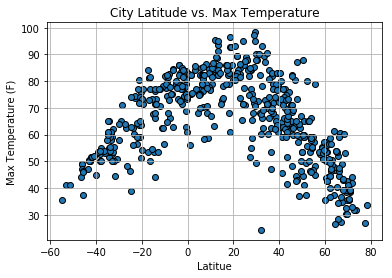

In [19]:
x = cities_df["Lat"]
y = cities_df["Max Temp"]

fig, ax = plt.subplots()
plt.scatter(x,y, marker="o", edgecolor="black")
plt.xlabel('Latitue')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
ax.grid()
plt.savefig('output_data/Lat_vs_Temp.png')

#### Latitude vs. Humidity Plot

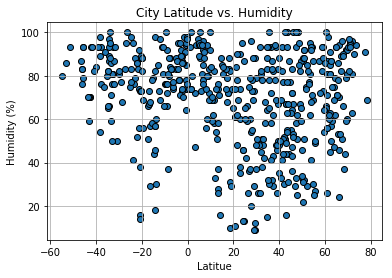

In [21]:
x = cities_df["Lat"]
y = cities_df["Humidity"]

fig, ax = plt.subplots()
plt.scatter(x,y, marker="o", edgecolor="black")
plt.xlabel('Latitue')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
ax.grid()
plt.savefig('output_data/Lat_vs_Hum.png')

#### Latitude vs. Cloudiness Plot

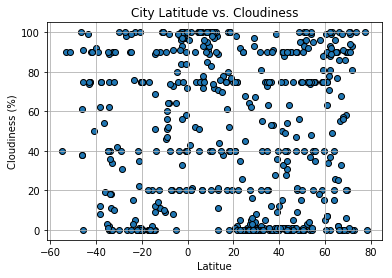

In [23]:
x = cities_df["Lat"]
y = cities_df["Cloudiness"]

fig, ax = plt.subplots()
plt.scatter(x,y, marker="o", edgecolor="black")
plt.xlabel('Latitue')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
ax.grid()
plt.savefig("output_data/Lat_vs_Cloud.png")

#### Latitude vs. Wind Speed Plot

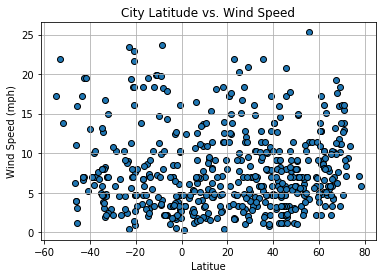

In [25]:
x = cities_df["Lat"]
y = cities_df["Wind Speed"]

fig, ax = plt.subplots()
plt.scatter(x,y, marker="o", edgecolor="black")
plt.xlabel('Latitue')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
ax.grid()
plt.savefig("output_data/Lat_vs_Wind.png")